In [1]:
from body_matrix import infer
from body_matrix import load
from body_matrix import process
from body_matrix import measure
from body_matrix import draw

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Raw_Vids/VID_20230111_162031~2.mp4",
    -90, 
    10
)


keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
	sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)


segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
	sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)


selected_kps = process.keypoints_filter(
    ['left_hip', 'right_hip', 'left_wrist', 'right_wrist'], 
    keypoints
)


segment_area = process.segmentation_area(
    sample_frame, 
    bool_mask
)

Found  10  person in the frame
Distances:  [40.35784912109375, 233.093505859375, 104.69561767578125, 132.02239990234375, 530.2337646484375, 311.50782775878906, 505.93914794921875, 165.59925842285156, 411.34228515625, 164.2061309814453]
Areas:  [371911.1758908257, 3590.3681881576777, 3387.798127055168, 1500.1444985568523, 3633.2082251012325, 1295.688317231834, 972.0236186981201, 980.3198972269893, 3109.045806489885, 2310.2450021132827]
FOCUSES:  [9215.336892085254, 15.40312405925089, 32.358547590276565, 11.362802824872908, 6.8520876400811055, 4.159408534141648, 1.9212263424131837, 5.919832652413085, 7.558293709845321, 14.06917627438851]
Select keypoint index 0
Found  3  person in the frame
[413.595458984375, 521.8230590820312, 769.0029907226562, 1557.7841796875]
[403.276611328125, 520.5043334960938, 765.4390869140625, 1547.42236328125]
[421.0204162597656, 604.05908203125, 454.82366943359375, 706.353515625]
[403.276611328125, 520.5043334960938, 765.4390869140625, 1547.42236328125]
[289.7

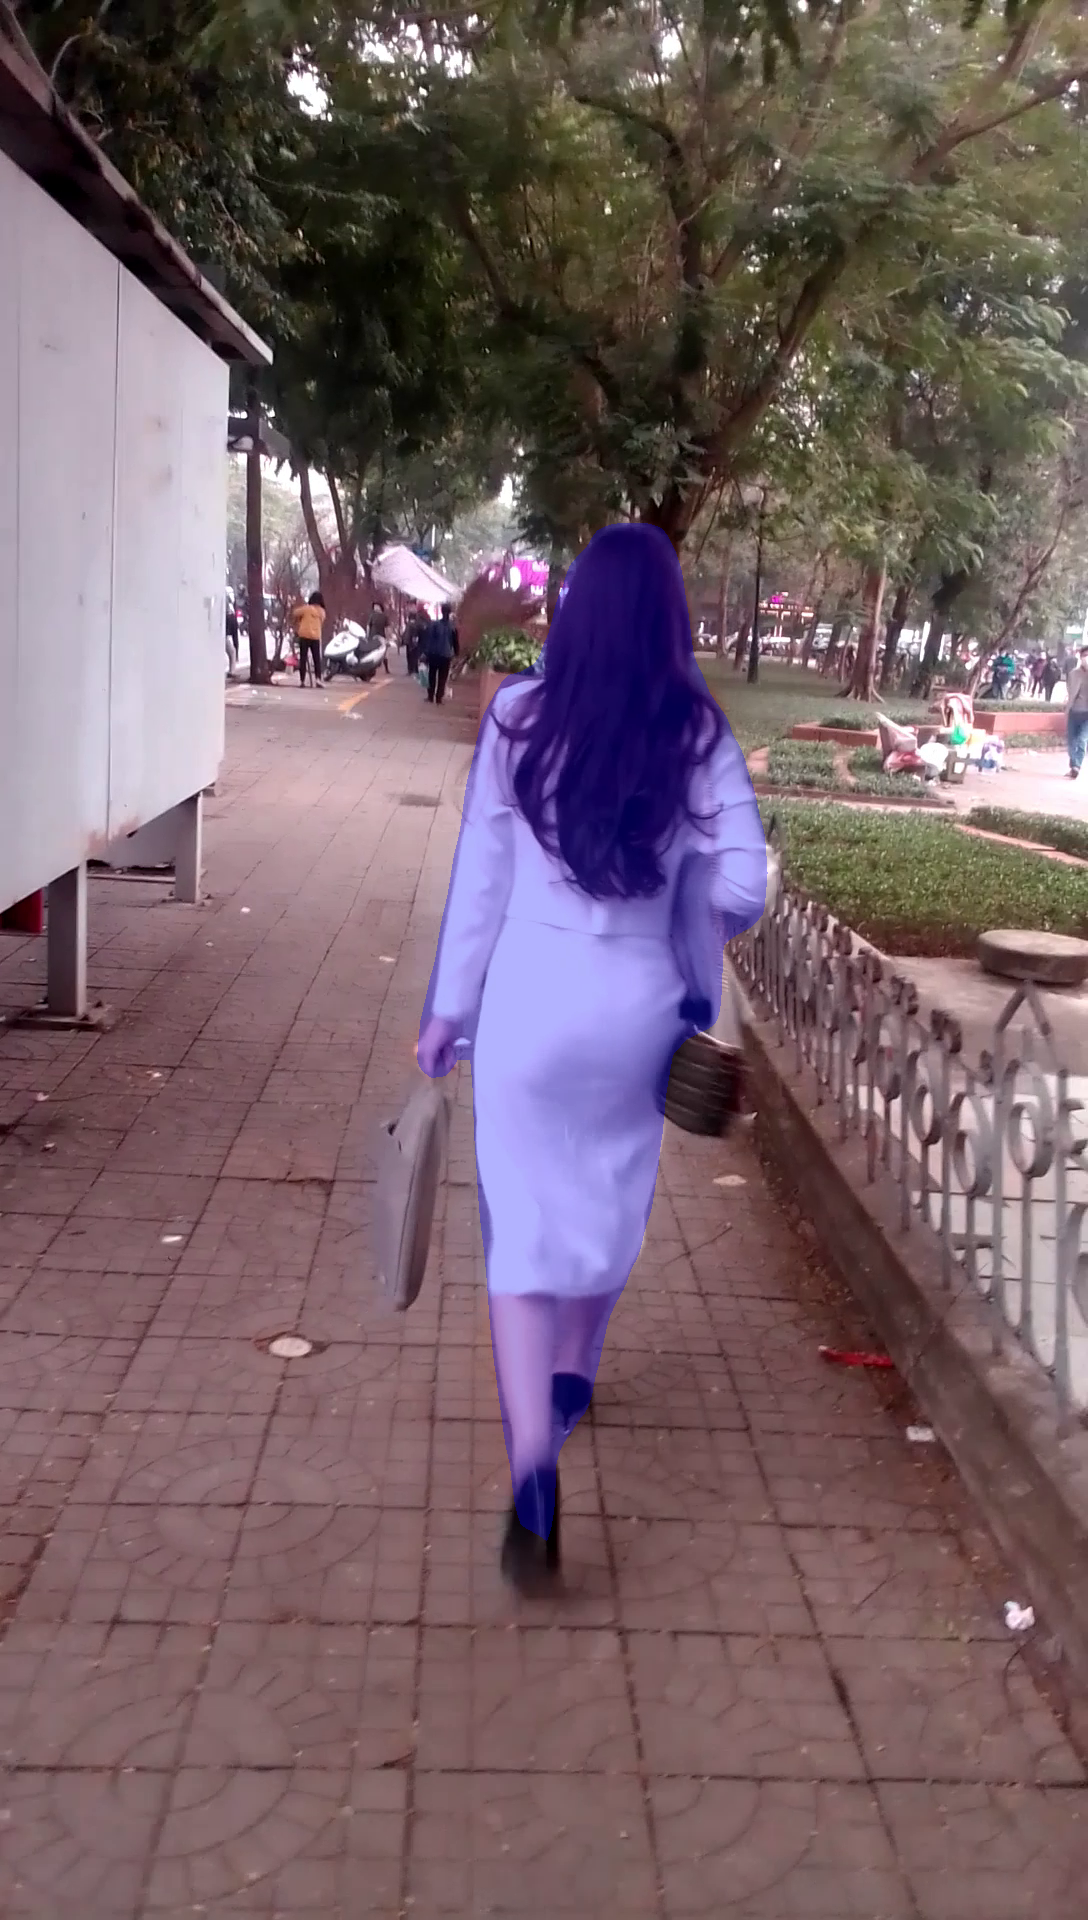

In [2]:
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
from torchvision.utils import draw_segmentation_masks

segment_tensor_image = pil_to_tensor(sample_frame)
segment_mask_image = draw_segmentation_masks(
    segment_tensor_image, 
    bool_mask, 
    alpha=0.3, 
    colors=["blue"]    
)

segment_image = to_pil_image(segment_mask_image)
segment_image

In [3]:
selected_kps

{'left_wrist': [452.8583984375, 997.9564208984375],
 'right_wrist': [718.7315673828125, 1035.4036865234375],
 'left_hip': [530.4646606445312, 977.7925415039062],
 'right_hip': [643.9996948242188, 982.1133422851562]}

left_wrist [452.8583984375, 997.9564208984375]
right_wrist [718.7315673828125, 1035.4036865234375]
left_hip [530.4646606445312, 977.7925415039062]
right_hip [643.9996948242188, 982.1133422851562]


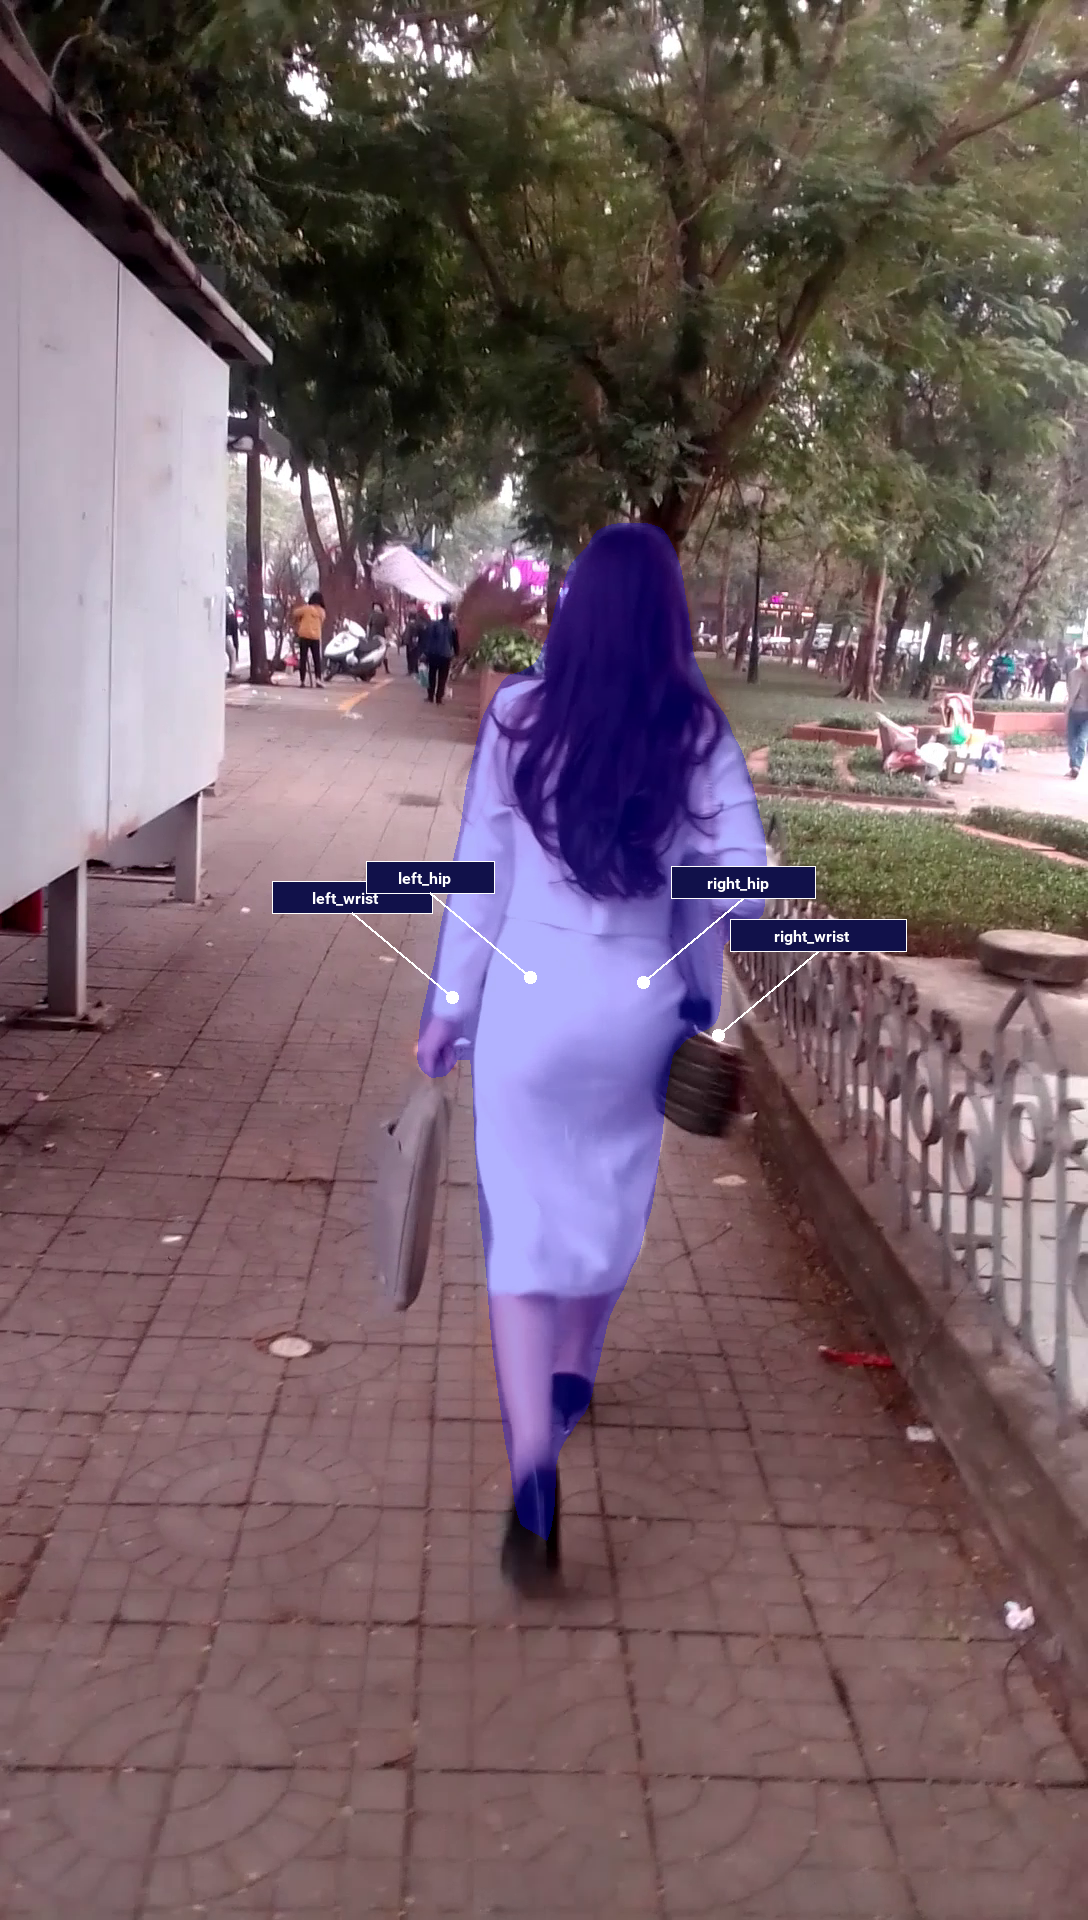

In [4]:
float_selected_frame = segment_image
middle_hip = measure.find_middle_point(
    selected_kps['left_hip'], 
    selected_kps['right_hip']
)

for key, value in selected_kps.items():
    print(key, value)
    
    float_selected_frame = draw.floating_rectangle_label(
        image = float_selected_frame, 
        longitude_coordinate = middle_hip[0], 
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )
    
float_selected_frame

In [5]:
hip_kps = process.find_hip_points(
    selected_kps['left_hip'],
    selected_kps['right_hip'], 
    selected_kps['left_wrist'], 
    selected_kps['right_wrist'], 
    segment_area
)

hip_kps.update({
    "middle_hip": middle_hip    
})

hip_kps

{'left_hip': (474, 979),
 'right_hip': (700, 984),
 'middle_hip': (587.232177734375, 979.9529418945312)}

left_hip (474, 979)
right_hip (700, 984)
middle_hip (587.232177734375, 979.9529418945312)


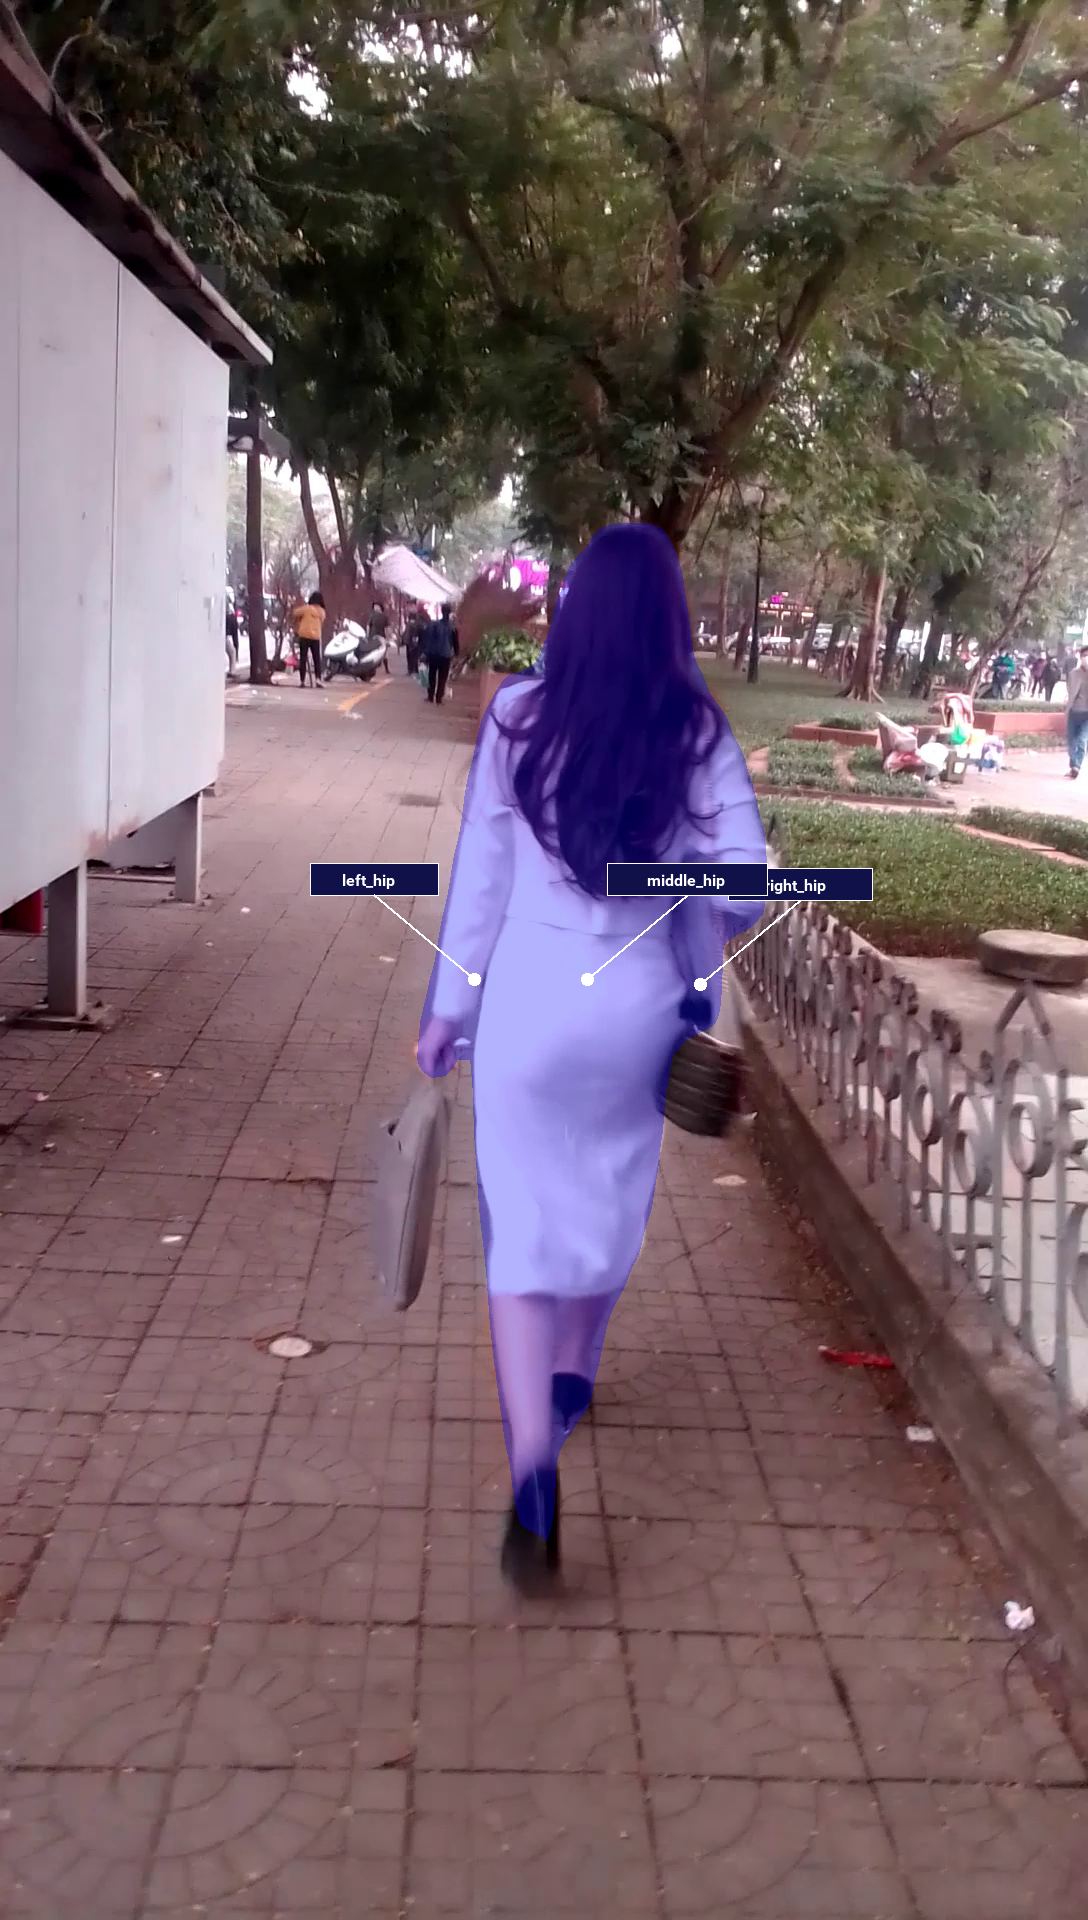

In [6]:
from body_matrix import measure
from body_matrix import draw


float_labeled_frame = segment_image
for key, value in hip_kps.items():
    print(key, value)
    float_labeled_frame = draw.floating_rectangle_label(
        image = float_labeled_frame, 
        longitude_coordinate = middle_hip[0], 
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )    
        
        
float_labeled_frame 

In [7]:
contours = process.segmentation_contour(
    sample_frame, 
    bool_mask
)

In [8]:
sorted(contours[-1])

[546, 1540]

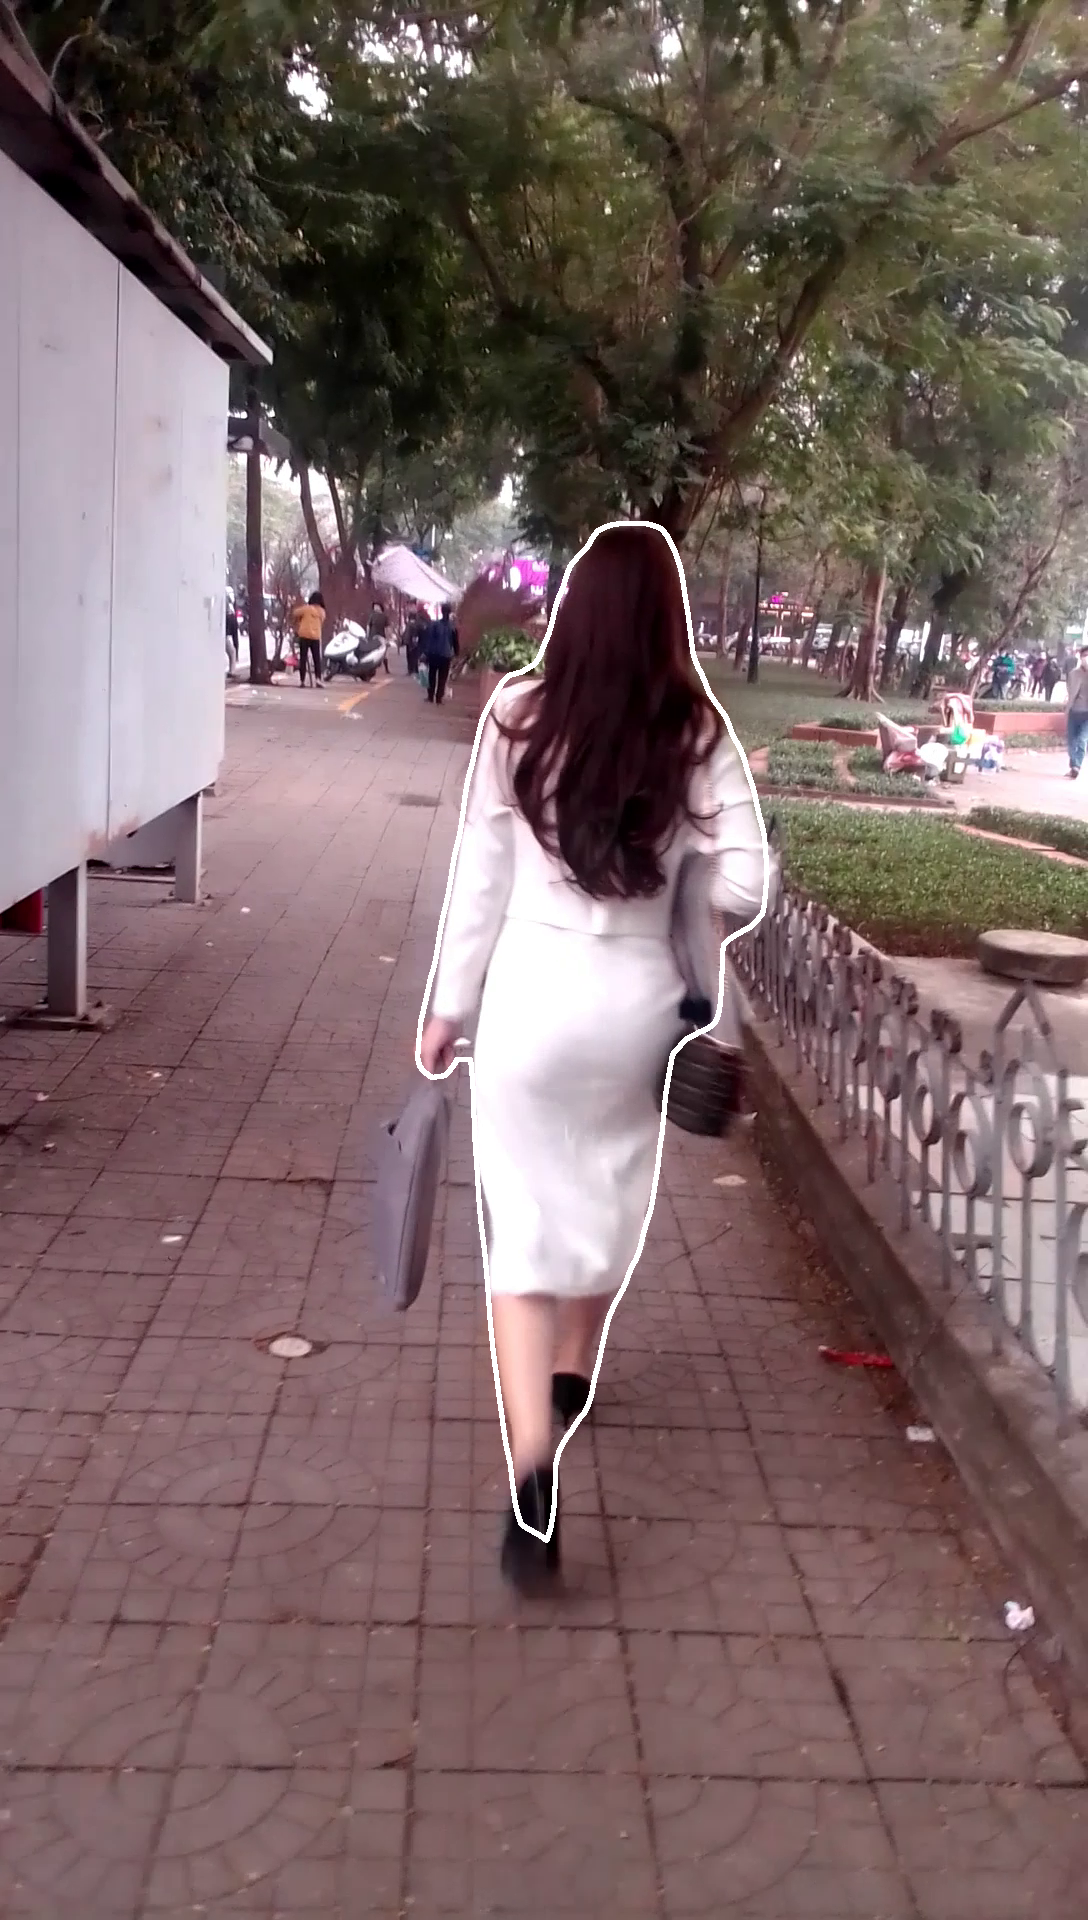

In [9]:
contoured_image = draw.segmentation_contour(
    contour_pixels = contours, 
    contour_color = "#ffffff",
    contour_size=2,
    font="/content/drive/MyDrive/Body_Matrix/Roboto-Bold.ttf", 
    image=sample_frame
)

contoured_image